# IS 362 - Final Project
Sunah Lee

For my final project, I will analyze NYPD 311 Service Requests from January to April 2019 and January to April 2020, both datasets from NYC Open Data.
The data includes when the 311 service requests were created, when it was closed, and what kind of complaint it was. I hope to portray an accurate and visual analysis of the data, and especially show how the data changed (if it did at all) since the COVID-19 quarantine was put in place in NYC.

#### Import the data 
Data from: https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9/data

In [15]:
import pandas as pd
import numpy as np
import html5lib
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline

service_requests = pd.read_csv("311_Service_Requests_from_2019_2020.csv", engine='python')
service_requests.head()

,Unique_Key,Created_date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location Type,Incident_Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,45309507,5-Jan-20,5-Jan-20,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10038.0,111 JOHN STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.707671,-74.005764,"(40.70767058299684, -74.00576377348087)"
1,45309521,5-Jan-20,5-Jan-20,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Music,Street/Sidewalk,11422.0,259-04 147 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.657422,-73.729317,"(40.65742207878771, -73.72931707709266)"
2,45309523,4-Jan-20,5-Jan-20,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11220.0,255 56 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.645055,-74.019275,"(40.64505532105482, -74.01927502636711)"
3,45309525,4-Jan-20,5-Jan-20,NYPD,New York City Police Department,Abandoned Vehicle,With License Plate,NaN,11232.0,168 35 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.655654,-74.005143,"(40.65565442769171, -74.00514298605677)"
4,45309526,5-Jan-20,5-Jan-20,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,10314.0,51 BERESFORD AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.588051,-74.189418,"(40.58805066306424, -74.18941751780291)"


#### Review the data and look for missing information

In [16]:
service_requests.count()

Unique_Key                        476409
Created_date                      476409
Closed_Date                       474852
Agency                            476409
Agency_Name                       476409
Complaint_Type                    476409
Descriptor                        471191
Location Type                     438320
Incident_Zip                      475831
Incident Address                  459253
Street Name                       459248
Cross Street 1                    457133
Cross Street 2                    456887
Intersection Street 1             266749
Intersection Street 2             266478
Address Type                      225278
City                              461761
Landmark                          236513
Facility Type                     225047
Status                            476409
Due Date                          225588
Resolution Description            474985
Resolution Action Updated Date    475012
Community Board                   476409
BBL             

#### Display only the columns needed
Columns needes are unique_key, created_date, closed_date, agency, agency_name, complaint_type, incident_zip. I also separated the 'created_date' column into 'created_Year', 'created_Month', and 'created_date'.

In [17]:
df = pd.DataFrame(service_requests)
df[['created_date','created_Month', 'created_Year']] = df.Created_date.str.split("-",expand=True,)
df[['Complaint_Type','complaint_detail']] = df.Complaint_Type.str.split("-",expand=True,)
output = (df[['Unique_Key', 'created_Year', 'created_Month', 'Closed_Date', 'Agency', 'Agency_Name', 'Complaint_Type', 'Status', 'Incident_Zip']])
output.head(10)

,Unique_Key,created_Year,created_Month,Closed_Date,Agency,Agency_Name,Complaint_Type,Status,Incident_Zip
0,45309507,20,Jan,5-Jan-20,NYPD,New York City Police Department,Noise,Closed,10038.0
1,45309521,20,Jan,5-Jan-20,NYPD,New York City Police Department,Noise,Closed,11422.0
2,45309523,20,Jan,5-Jan-20,NYPD,New York City Police Department,Illegal Parking,Closed,11220.0
3,45309525,20,Jan,5-Jan-20,NYPD,New York City Police Department,Abandoned Vehicle,Closed,11232.0
4,45309526,20,Jan,5-Jan-20,NYPD,New York City Police Department,Noise,Closed,10314.0
5,45309529,20,Jan,5-Jan-20,NYPD,New York City Police Department,Noise,Closed,11103.0
6,45309530,20,Jan,5-Jan-20,NYPD,New York City Police Department,Noise,Closed,11106.0
7,45309532,20,Jan,5-Jan-20,NYPD,New York City Police Department,Noise,Closed,11203.0
8,45309534,20,Jan,5-Jan-20,NYPD,New York City Police Department,Noise,Closed,11102.0
9,45302330,20,Jan,5-Jan-20,NYPD,New York City Police Department,Blocked Driveway,Closed,11236.0


#### Compare the number of service requests from 2019 and 2020

In [18]:
output.groupby(['created_Year', 'created_Month']).count()

Unique_Key  Closed_Date  Agency  Agency_Name  \
created_Year created_Month                                                 
19           Apr                 62936        62936   62936        62936   
             Feb                 48961        48961   48961        48961   
             Jan                 53147        53147   53147        53147   
             Mar                 60545        60545   60545        60545   
20           Apr                 70793        70483   70793        70793   
             Feb                 57201        56513   57201        57201   
             Jan                 62961        62418   62961        62961   
             Mar                 59865        59849   59865        59865   

                            Complaint_Type  Status  Incident_Zip  
created_Year created_Month                                        
19           Apr                     62936   62936         62844  
             Feb                     48961   48961         48901  
             Jan                     53147   53147         53093  
             Mar                     60545   60545         60480  
20           Apr                     70793   70793         70559  
             Feb                     57201   57201         57179  
             Jan                     62961   62961         62932  
             Mar                     59865   59865         59843

In [19]:
yearly_data = service_requests.groupby('created_Year').created_Year.count()
df = pd.DataFrame(yearly_data)
df

,created_Year
created_Year,
19,225589
20,250820


Text(0, 0.5, 'Service Requests')

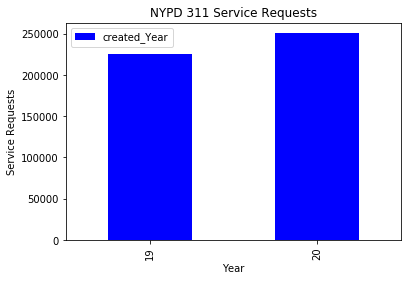

In [20]:
df.plot.bar(color="blue")
plt.title('NYPD 311 Service Requests')
plt.xlabel('Year')
plt.ylabel('Service Requests')

#### Compare the number of service requests from January to April in 2019

In [21]:
data_2019 = service_requests[(service_requests["created_Year"]=="19")]
monthly_data = data_2019.groupby('created_Month').created_Month.count()
df1 = pd.DataFrame(monthly_data)
df1

,created_Month
created_Month,
Apr,62936
Feb,48961
Jan,53147
Mar,60545


Text(0, 0.5, 'Service Requests')

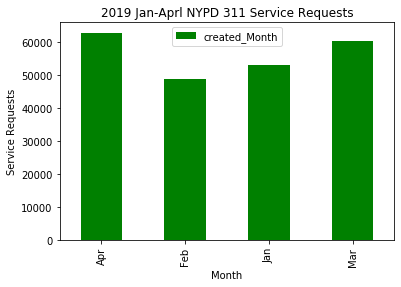

In [22]:
df1.plot.bar(color="green")
plt.title('2019 Jan-Aprl NYPD 311 Service Requests')
plt.xlabel('Month')
plt.ylabel('Service Requests')

#### Compare the number of service requests from January to April in 2020

In [23]:
data_2020 = service_requests[(service_requests["created_Year"]=="20")]
monthly_data = data_2020.groupby('created_Month').created_Month.count()
df2 = pd.DataFrame(monthly_data)
df2

,created_Month
created_Month,
Apr,70793
Feb,57201
Jan,62961
Mar,59865


Text(0, 0.5, 'Service Requests')

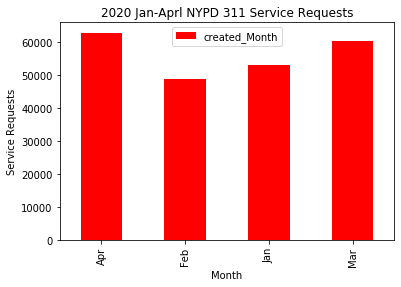

In [24]:
df1.plot.bar(color='red')
plt.title('2020 Jan-Aprl NYPD 311 Service Requests')
plt.xlabel('Month')
plt.ylabel('Service Requests')

#### Review Complaint Types from January 2019

In [25]:
data_Jan2019 = data_2019[(data_2019["created_Month"]=="Jan")]
complaint_data_Jan2019 = data_Jan2019.groupby('Complaint_Type', sort=False).Complaint_Type.count()
complaint_data_Jan2019.sort_index(ascending=False)
complaint_data_Jan2019

Complaint_Type
Noise                         22941
Animal                            1
Illegal Parking               13189
Abandoned Vehicle                 1
Derelict Vehicle               3327
Blocked Driveway              11393
Traffic                         250
Animal Abuse                    919
Graffiti                         16
Vending                         189
NonEmergency Police Matter      486
Urinating in Public              19
Illegal Fireworks                 4
Homeless Encampment             158
Drinking                         53
Drug Activity                   127
Panhandling                      37
Posting Advertisement            10
Bike/Roller/Skate Chronic        25
Disorderly Youth                  2
Name: Complaint_Type, dtype: int64

Text(0.5, 1.0, 'January 2019 Complaint Type')

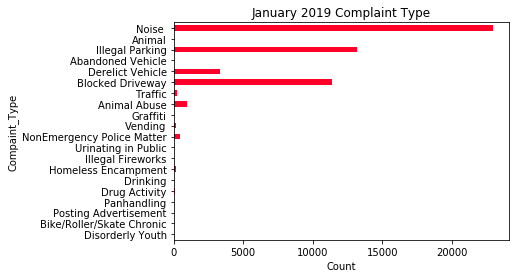

In [26]:
complaint_data_Jan2019.plot.barh(colormap='gist_rainbow').invert_yaxis()
plt.ylabel('Compaint_Type')
plt.xlabel('Count')
plt.title('January 2019 Complaint Type')

#### Review Complaint Types from Febuary 2019

In [27]:
data_Feb2019 = data_2019[(data_2019["created_Month"]=="Feb")]
complaint_data_Feb2019 = data_Feb2019.groupby('Complaint_Type', sort=False).Complaint_Type.count()
complaint_data_Feb2019.sort_index(ascending=False)
complaint_data_Feb2019

Complaint_Type
Noise                         21713
Abandoned Vehicle                 2
Illegal Parking               12253
Blocked Driveway               9906
NonEmergency Police Matter      650
Animal                            1
Drug Activity                   113
Derelict Vehicle               2955
Animal Abuse                    654
Homeless Encampment             131
Traffic                         264
Vending                         178
Urinating in Public              24
Graffiti                         13
Panhandling                      13
Drinking                         53
Disorderly Youth                  4
Posting Advertisement            18
Bike/Roller/Skate Chronic        14
Illegal Fireworks                 1
Squeegee                          1
Name: Complaint_Type, dtype: int64

Text(0.5, 1.0, 'February 2019 Complaint Type')

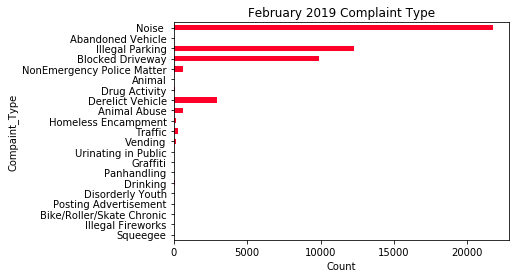

In [28]:
complaint_data_Feb2019.plot.barh(colormap='gist_rainbow').invert_yaxis()
plt.ylabel('Compaint_Type')
plt.xlabel('Count')
plt.title('February 2019 Complaint Type')

#### Review Complaint Types from March 2019

In [29]:
data_Mar2019 = data_2019[(data_2019["created_Month"]=="Mar")]
complaint_data_Mar2019 = data_Mar2019.groupby('Complaint_Type', sort=False).Complaint_Type.count()
complaint_data_Mar2019.sort_index(ascending=False)
complaint_data_Mar2019

Complaint_Type
Illegal Parking               15283
Noise                         27796
Blocked Driveway              11582
NonEmergency Police Matter      751
Abandoned Vehicle                 1
Vending                         220
Traffic                         327
Drinking                         81
Derelict Vehicle               3366
Animal Abuse                    636
Homeless Encampment             223
Drug Activity                   134
Panhandling                      39
Urinating in Public              33
Posting Advertisement             9
Illegal Fireworks                 3
Graffiti                         14
Bike/Roller/Skate Chronic        39
Disorderly Youth                  8
Name: Complaint_Type, dtype: int64

Text(0.5, 1.0, 'March 2019 Complaint Type')

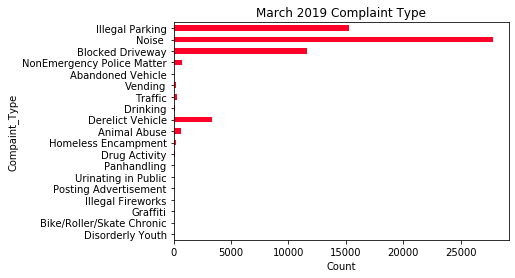

In [30]:
complaint_data_Mar2019.plot.barh(colormap='gist_rainbow').invert_yaxis()
plt.ylabel('Compaint_Type')
plt.xlabel('Count')
plt.title('March 2019 Complaint Type')

#### Review Complaint Types from April 2019

In [31]:
data_Apr2019 = data_2019[(data_2019["created_Month"]=="Apr")]
complaint_data_Apr2019 = data_Apr2019.groupby('Complaint_Type', sort=False).Complaint_Type.count()
complaint_data_Apr2019.sort_index(ascending=False)
complaint_data_Apr2019

Complaint_Type
Blocked Driveway              10001
Noise                         32331
Illegal Parking               14580
NonEmergency Police Matter      706
Derelict Vehicle               3275
Traffic                         337
Animal Abuse                    616
Homeless Encampment             284
Drinking                        102
Vending                         390
Panhandling                      46
Disorderly Youth                 10
Drug Activity                   134
Illegal Fireworks                 3
Graffiti                         12
Posting Advertisement            10
Urinating in Public              49
Bike/Roller/Skate Chronic        50
Name: Complaint_Type, dtype: int64

Text(0.5, 1.0, 'April 2019 Complaint Type')

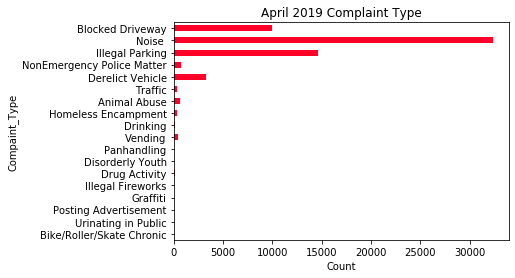

In [32]:
complaint_data_Apr2019.plot.barh(colormap='gist_rainbow').invert_yaxis()
plt.ylabel('Compaint_Type')
plt.xlabel('Count')
plt.title('April 2019 Complaint Type')

#### Review Complaint Types from January 2020

In [33]:
data_Jan2020 = data_2020[(data_2020["created_Month"]=="Jan")]
complaint_data_Jan2020 = data_Jan2020.groupby('Complaint_Type', sort=False).Complaint_Type.count()
complaint_data_Jan2020.sort_index(ascending=False)
complaint_data_Jan2020

Complaint_Type
Noise                         27196
Illegal Parking               16937
Abandoned Vehicle              3760
Blocked Driveway              11415
Homeless Encampment             178
Drinking                        129
Drug Activity                   243
Animal                          738
NonEmergency Police Matter      706
Posting Advertisement             6
Vending                         222
Urinating in Public              20
Bike/Roller/Skate Chronic        26
Graffiti                         71
Traffic                         208
Panhandling                     560
Illegal Fireworks                17
Homeless Street Condition       523
Disorderly Youth                  6
Name: Complaint_Type, dtype: int64

Text(0.5, 1.0, 'January 2020 Complaint Type')

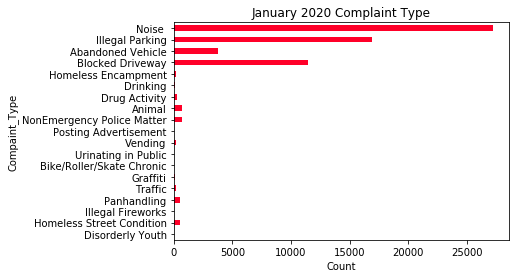

In [34]:
complaint_data_Jan2020.plot.barh(colormap='gist_rainbow').invert_yaxis()
plt.ylabel('Compaint_Type')
plt.xlabel('Count')
plt.title('January 2020 Complaint Type')

#### Review Complaint Types from February 2020

In [35]:
data_Feb2020 = data_2020[(data_2020["created_Month"]=="Feb")]
complaint_data_Feb2020 = data_Feb2020.groupby('Complaint_Type', sort=False).Complaint_Type.count()
complaint_data_Feb2020.sort_index(ascending=False)
complaint_data_Feb2020

Complaint_Type
Blocked Driveway              10126
Abandoned Vehicle              3371
Animal                          625
Illegal Parking               15163
Noise                         25199
NonEmergency Police Matter      649
Graffiti                         62
Drinking                         85
Drug Activity                   228
Homeless Street Condition       609
Vending                         239
Illegal Fireworks                 4
Panhandling                     579
Traffic                         184
Disorderly Youth                  5
Bike/Roller/Skate Chronic        29
Urinating in Public              38
Posting Advertisement             5
Squeegee                          1
Name: Complaint_Type, dtype: int64

Text(0.5, 1.0, 'February 2020 Complaint Type')

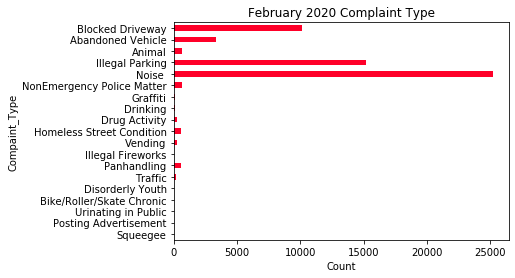

In [36]:
complaint_data_Feb2020.plot.barh(colormap='gist_rainbow').invert_yaxis()
plt.ylabel('Compaint_Type')
plt.xlabel('Count')
plt.title('February 2020 Complaint Type')

#### Review Complaint Types from March 2020

In [37]:
data_Mar2020 = data_2020[(data_2020["created_Month"]=="Mar")]
complaint_data_Mar2020 = data_Mar2020.groupby('Complaint_Type', sort=False).Complaint_Type.count()
complaint_data_Mar2020.sort_index(ascending=False)
complaint_data_Mar2020

Complaint_Type
Noise                         32579
Illegal Parking               12732
Blocked Driveway               7741
Urinating in Public              65
Abandoned Vehicle              2500
Homeless Street Condition       452
Traffic                         154
Drinking                        134
Animal                          520
NonEmergency Police Matter     2333
Panhandling                      17
Graffiti                         70
Drug Activity                   272
Vending                         233
Bike/Roller/Skate Chronic        30
Illegal Fireworks                 7
Posting Advertisement             7
Disorderly Youth                 19
Name: Complaint_Type, dtype: int64

Text(0.5, 1.0, 'March 2020 Complaint Type')

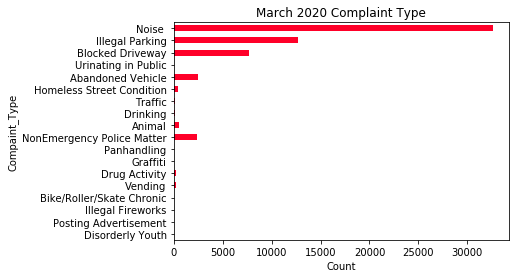

In [38]:
complaint_data_Mar2020.plot.barh(colormap='gist_rainbow').invert_yaxis()
plt.ylabel('Compaint_Type')
plt.xlabel('Count')
plt.title('March 2020 Complaint Type')

#### Review Complaint Types from April 2020

In [39]:
data_Apr2020 = data_2020[(data_2020["created_Month"]=="Apr")]
complaint_data_Apr2020 = data_Apr2020.groupby('Complaint_Type', sort=False).Complaint_Type.count()
complaint_data_Apr2020.sort_index(ascending=False)
complaint_data_Apr2020

Complaint_Type
NonEmergency Police Matter    22388
Noise                         35866
Traffic                         141
Illegal Parking                6544
Blocked Driveway               3083
Drug Activity                   256
Abandoned Vehicle               994
Homeless Street Condition       734
Animal                          398
Graffiti                         98
Drinking                         73
Panhandling                      23
Urinating in Public              51
Vending                          70
Homeless Encampment              15
Bike/Roller/Skate Chronic        25
Disorderly Youth                 12
Illegal Fireworks                18
Posting Advertisement             3
Squeegee                          1
Name: Complaint_Type, dtype: int64

Text(0.5, 1.0, 'April 2020 Complaint Type')

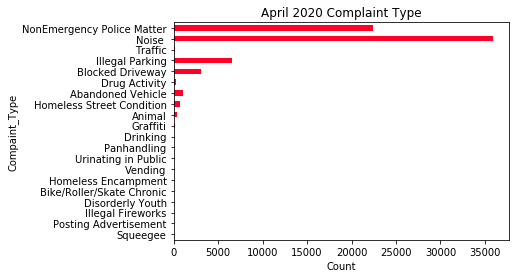

In [40]:
complaint_data_Apr2020.plot.barh(colormap='gist_rainbow').invert_yaxis()
plt.ylabel('Compaint_Type')
plt.xlabel('Count')
plt.title('April 2020 Complaint Type')

In [45]:
output.groupby('Status').count()

,Unique_Key,created_Year,created_Month,Closed_Date,Agency,Agency_Name,Complaint_Type,Incident_Zip
Status,,,,,,,,
Closed,474852,474852,474852,474852,474852,474852,474852,474274
In Progress,1557,1557,1557,0,1557,1557,1557,1557


In [43]:
output.groupby(['created_Year', 'created_Month', 'Status']).count()

Unique_Key  Closed_Date  Agency  \
created_Year created_Month Status                                         
19           Apr           Closed            62936        62936   62936   
             Feb           Closed            48961        48961   48961   
             Jan           Closed            53147        53147   53147   
             Mar           Closed            60545        60545   60545   
20           Apr           Closed            70483        70483   70483   
                           In Progress         310            0     310   
             Feb           Closed            56513        56513   56513   
                           In Progress         688            0     688   
             Jan           Closed            62418        62418   62418   
                           In Progress         543            0     543   
             Mar           Closed            59849        59849   59849   
                           In Progress          16            0      16   

                                        Agency_Name  Complaint_Type  \
created_Year created_Month Status                                     
19           Apr           Closed             62936           62936   
             Feb           Closed             48961           48961   
             Jan           Closed             53147           53147   
             Mar           Closed             60545           60545   
20           Apr           Closed             70483           70483   
                           In Progress          310             310   
             Feb           Closed             56513           56513   
                           In Progress          688             688   
             Jan           Closed             62418           62418   
                           In Progress          543             543   
             Mar           Closed             59849           59849   
                           In Progress           16              16   

                                        Incident_Zip  
created_Year created_Month Status                     
19           Apr           Closed              62844  
             Feb           Closed              48901  
             Jan           Closed              53093  
             Mar           Closed              60480  
20           Apr           Closed              70249  
                           In Progress           310  
             Feb           Closed              56491  
                           In Progress           688  
             Jan           Closed              62389  
                           In Progress           543  
             Mar           Closed              59827  
                           In Progress            16

In [47]:
cases_by_status = output.groupby(['Status', 'Complaint_Type']).Complaint_Type.count()
cases_by_status

Status       Complaint_Type            
Closed       Abandoned Vehicle              10561
             Animal                          2270
             Animal Abuse                    2825
             Bike/Roller/Skate Chronic        238
             Blocked Driveway               75018
             Derelict Vehicle               12923
             Disorderly Youth                  65
             Drinking                         709
             Drug Activity                   1501
             Graffiti                         356
             Homeless Encampment              989
             Homeless Street Condition       2302
             Illegal Fireworks                 56
             Illegal Parking               106426
             Noise                         224701
             NonEmergency Police Matter     28626
             Panhandling                     1313
             Posting Advertisement             68
             Squeegee                           3
          

Text(0.5, 1.0, 'Cases still In Progress as of May 2020')

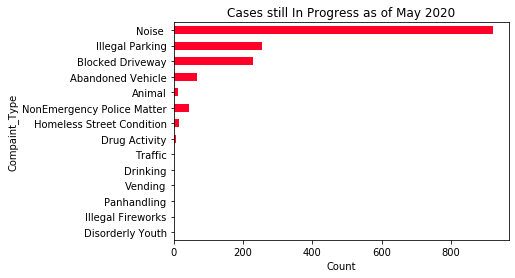

In [50]:
open_cases = output[(output["Status"]=="In Progress")]
open_cases_type = open_cases.groupby('Complaint_Type', sort=False).Complaint_Type.count()

open_cases_type.plot.barh(colormap='gist_rainbow').invert_yaxis()
plt.ylabel('Compaint_Type')
plt.xlabel('Count')
plt.title('Cases still In Progress as of May 2020')

## Conclusion
After comparing NYPD 311 service request calls placed in January-April 2019 and January-April 2020 within NYC area, I arrived at the following conclusions:

(1) Total service requests in 2019 Jan-Apr was 225,589 and it was 250,820 in the same time frame in 2020. Therefore, it increased from 2019 to 2020.

(2) The number of service requests increased each corresponding month in 2019 to 2020 except in March, where it decreased from 65,545 to 59,865.

(3) In Jan, Feb, Mar, and Apr of 2019, as well as Jan, Feb, and Mar of 2020, the top three types of Complaints were, Noise, Illegal Parking and Blocked Driveway, in that order.

(4) In April 2020, the top three complaint types were Noise, NonEmergency Police Matter, and Illegal Parking (in that order). Rise in Nonemergency police matter complaints and decrease in Illegal Parking and Blocked Driveway complaints may be explained by the COVID-19 stay-at-home lockdown in NYC from mid-March to May 2020.

(5) There are still 1,557 cases open to date, the information gets updated daily. Most of them are noise complaints